## Importamos las librerias necesarias para el proyecto

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Cargamos las imagenes para generear los conjuntos de entrenamiento

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')


# Definir la ruta a las imágenes en Google Drive
#train_data_dir = '/content/drive/MyDrive/PROYECTO-IA-CANCERDEPIEL/Grupo3_IA_CancerPiel/train'

# Definir la ruta a las imágenes de forma local
train_data_dir = r'C:\Users\elias\Downloads\CANCER DE PIEL\Grupo3_IA_CancerPiel\train'


In [3]:
# Crear un generador de imágenes con aumentación
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Escala los píxeles entre 0 y 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Dividimos el dataset en 80% entrenamiento y 20% validación
)

In [4]:
# Generador para los datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),  # Tamaño al que se redimensionan las imágenes
    batch_size=32,
    class_mode='binary',  # Como tenemos dos clases, usamos 'binary'
    subset='training'
)
print(train_generator.class_indices)


Found 1246 images belonging to 2 classes.
{'benign': 0, 'malignant': 1}


In [5]:
# Generador para los datos de validación
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 311 images belonging to 2 classes.


## Creacion del Modelo

In [42]:
# Construimos el modelo
model = Sequential()

In [43]:
from tensorflow.keras.layers import Input

# Definir el modelo como secuencial
model = Sequential()

# Usar Input para definir la forma de la entrada
model.add(Input(shape=(128, 128, 3)))

# Primera capa de convolución y pooling
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [44]:
# Segunda capa de convolución y pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [45]:
# Tercera capa de convolución y pooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [46]:
# Aplanamiento
model.add(Flatten())

In [47]:
# Capa totalmente conectada (densa)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularización para evitar sobreajuste

In [48]:
# Capa de salida
model.add(Dense(1, activation='sigmoid'))  # 'sigmoid' para clasificación binaria

In [49]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# Resumen del modelo
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento del Modelo

In [51]:
# Definir el peso de las clases en función del desbalance
total_images = 288 + 958
weight_for_benign = total_images / (2 * 288)
weight_for_malignant = total_images / (2 * 958)

class_weight = {0: weight_for_benign, 1: weight_for_malignant}

# Entrenar el modelo con los pesos ajustados
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    class_weight=class_weight,  # Pasar el ajuste de pesos de clase
    epochs=10
)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.5935 - loss: 0.6812 - val_accuracy: 0.5243 - val_loss: 0.7503
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.6875 - loss: 0.7559 - val_accuracy: 0.6087 - val_loss: 0.7104
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.6965 - loss: 0.5474 - val_accuracy: 0.7882 - val_loss: 0.5237
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7500 - loss: 0.5898 - val_accuracy: 0.7826 - val_loss: 0.4897
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8345 - loss: 0.4645 - val_accuracy: 0.8264 - val_loss: 0.5104
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9062 - loss: 0.3594 - val_accuracy: 0.8261 - val_loss: 0.4423
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8416 - loss: 0.4317 - val_accuracy: 0.6389 - val_loss: 0.6890
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6875 - loss: 0.5959 - val_accuracy: 0.6087 - val_los

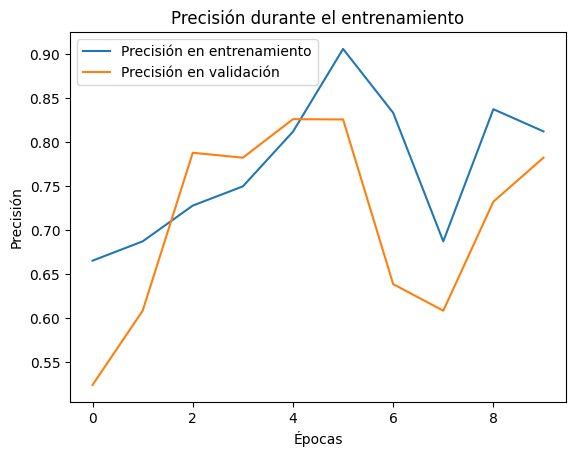

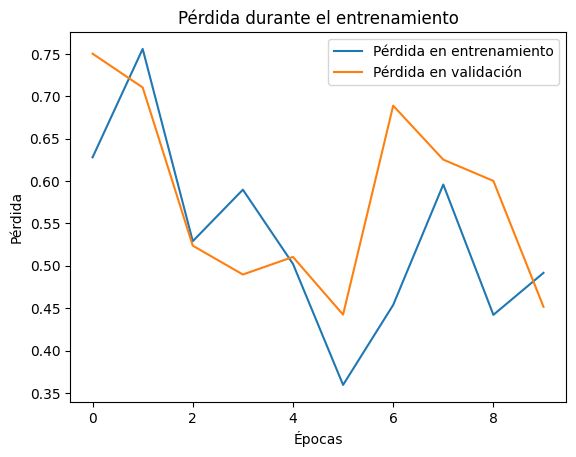

In [64]:
import matplotlib.pyplot as plt

# Graficar la precisión y la pérdida
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


## Evaluacion del modelo y guardado del mismo

In [58]:
# Evaluar el modelo
loss, accuracy = model.evaluate(validation_generator)
print(f'Precisión en el set de validación: {accuracy * 100:.2f}%')

# Guardar el modelo entrenado
model.save('/content/drive/MyDrive/PROYECTO-IA-CANCERDEPIEL/AI-Detected-Cancer-Repositorio/Model/modelo_cancer_piel.keras')

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 575ms/step - accuracy: 0.8139 - loss: 0.4690
Precisión en el set de validación: 79.42%


In [56]:
print(f"Imágenes benignas: {train_generator.classes.tolist().count(0)}")
print(f"Imágenes malignas: {train_generator.classes.tolist().count(1)}")

Imágenes benignas: 288
Imágenes malignas: 958


In [57]:
# Revisar el mapeo de clases
print(train_generator.class_indices)

{'benign': 0, 'malignant': 1}
